# Building a Cohort Matrix


__Import necessary modules__

In [1]:
from os.path import join
from pandas import read_csv

Define some global variables.

In [2]:
DATA_FOLDER = "data"
PLOTS_FOLDER = "plots"

Load CSV file.

In [3]:
filename = "./dataset.csv"
filepath = join(DATA_FOLDER, filename)

df = read_csv(filepath, sep=',')

print("Dataframe has %s rows." % len(df))
print("Dataframe head:\n%s" % df.head())

Dataframe has 42560 rows.
Dataframe head:
   transaction_id  user_id transaction_date
0          164519       17       2018-07-06
1          164519       17       2018-07-06
2          164586       17       2018-07-09
3          166425       17       2018-07-20
4          166425       17       2018-07-20


Since we're interested in building a cohort matrix per month, let's remove the day from our date column.

In [4]:
df["date"] = df["transaction_date"].apply(lambda x: x[:7])

print(df.head())

   transaction_id  user_id transaction_date     date
0          164519       17       2018-07-06  2018-07
1          164519       17       2018-07-06  2018-07
2          164586       17       2018-07-09  2018-07
3          166425       17       2018-07-20  2018-07
4          166425       17       2018-07-20  2018-07


We can now remove `transaction_date` column. We will use the new `date` column to build the cohort.

In [5]:
df.drop(columns="transaction_date", axis=1, inplace=True)

In [6]:
# Drop duplicate columns
df.drop_duplicates(inplace=True)

In [7]:
print(df.head())

   transaction_id  user_id     date
0          164519       17  2018-07
2          164586       17  2018-07
3          166425       17  2018-07
5          167990       17  2018-07
6          168399       17  2018-07


In [8]:
print("Dataframe has %s rows." % len(df))

Dataframe has 29102 rows.


Sanity check, make sure we don't have any invalid `user_id`.

In [9]:
df.user_id.isnull().sum()

0

Define some useful column names, we will use that later.

In [10]:
date_column = "date"
user_id_column = "user_id"
cohort_group_column = "cohort_group"

Find which Cohort group an user belongs to. I'm using [pipe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pipe.html) from pandas to apply a function to my dataframe.

In [11]:
from my_cohort.cohort import add_cohort_group_column

In [12]:
df = df.pipe(add_cohort_group_column, 
             user_id_column=user_id_column, 
             date_column=date_column, 
             cohort_group_column=cohort_group_column)

In [13]:
print(df.head())

   user_id  transaction_id     date cohort_group
0       17          164519  2018-07      2018-07
1       17          164586  2018-07      2018-07
2       17          166425  2018-07      2018-07
3       17          167990  2018-07      2018-07
4       17          168399  2018-07      2018-07


In [14]:
from my_cohort.cohort import build_cohort_dataframe

In [15]:
cohorts = df.pipe(build_cohort_dataframe, 
                  user_id_column=user_id_column, 
                  cohort_group_column=cohort_group_column, 
                  date_column=date_column)
print(cohorts.head())

                      total_user_id
cohort_group date                  
2018-03      2018-03            877
             2018-04            342
             2018-05            268
             2018-06            261
             2018-07            215


Find which cohort period.

In [16]:
from my_cohort.cohort import add_cohort_period_colum

In [17]:
cohorts = cohorts.pipe(add_cohort_period_colum)

In [19]:
print(cohorts.head())

                      total_user_id  cohort_period
cohort_group date                                 
2018-03      2018-03            877              1
             2018-04            342              2
             2018-05            268              3
             2018-06            261              4
             2018-07            215              5


Build Cohort Matrix (a.k.a user retention matrix)

In [20]:
from my_cohort.cohort import build_cohort_matrix

In [21]:
cohort_matrix = cohorts.pipe(build_cohort_matrix,
                             cohort_group_column, 
                             cohort_period_column="cohort_period", 
                             total_user_column="total_user_id")

In [22]:
print(cohort_matrix)

cohort_period   1         2         3         4         5         6   \
cohort_group                                                           
2018-03        1.0  0.389966  0.305587  0.297605  0.245154  0.223489   
2018-04        1.0  0.197368  0.180921  0.134868  0.133224  0.098684   
2018-05        1.0  0.242424  0.171717  0.135354  0.107071  0.086869   
2018-06        1.0  0.212377  0.154712  0.127989  0.105485  0.087201   
2018-07        1.0  0.238095  0.130952  0.123016  0.091270  0.079365   
2018-08        1.0  0.202670  0.150485  0.093447  0.066748  0.066748   
2018-09        1.0  0.205780  0.122543  0.094798  0.076301       NaN   
2018-10        1.0  0.173404  0.092553  0.077660       NaN       NaN   
2018-11        1.0  0.132732  0.100515       NaN       NaN       NaN   
2018-12        1.0  0.189983       NaN       NaN       NaN       NaN   
2019-01        1.0       NaN       NaN       NaN       NaN       NaN   

cohort_period        7         8         9         10        11

## Plot Cohort Matrix

In [22]:
from my_cohort.plot import plot_cohort_matrix

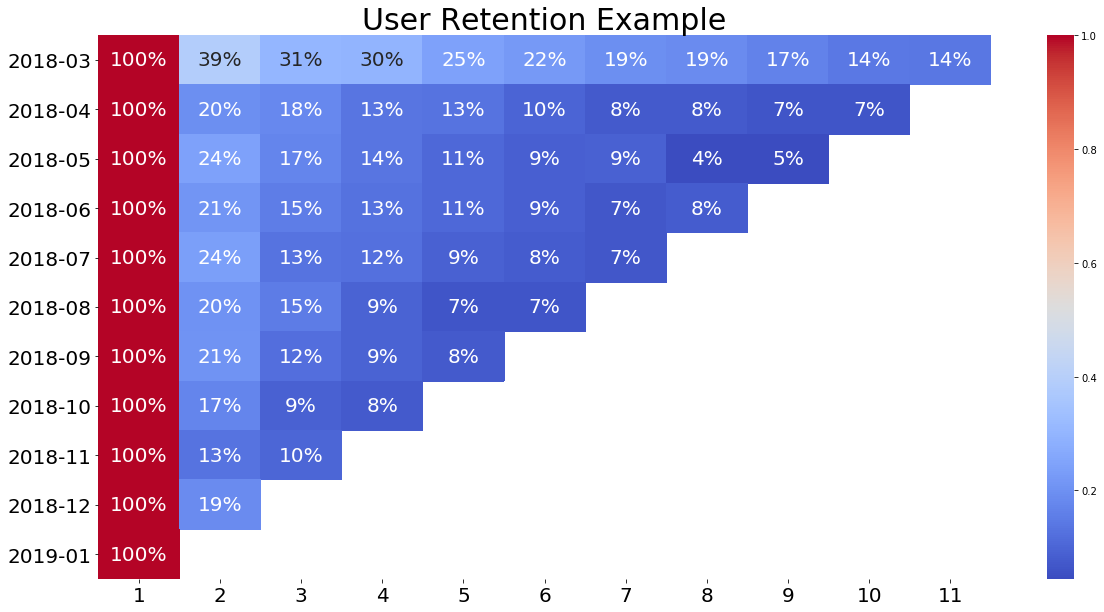

In [23]:
plot_cohort_matrix(cohort_matrix, plot_title="User Retention Example")